# Your info

Full name: Melika Nobakhtian

Student ID: 97522094

# Q2. MLP

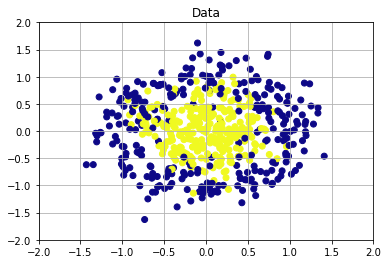

In [35]:
# Q2_graded
# Do not change the above line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import regularizers

np.random.seed(0)
# Dataset
X,Y = datasets.make_circles(n_samples=576, shuffle=True, noise=0.25, random_state=None, factor=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Data')
plt.show()

In [36]:
# Q2_graded
# Do not change the above line.
class Single_Layer:
  def __init__(
      self,
      number_of_units,
      activation_function,
      input_size = None
  ):
    self.input_size = input_size
    self.number_of_units = number_of_units
    self.W = None
    self.b = None
    self.A = None
    self.activation_func , self.dactivation = self.select_activation_function(activation_function)
  
  def select_activation_function(self, func):
    if func == 'sigmoid':
      act = self.sigmoid_activation
      dact = self.sigmoid_derivitive
    elif func == 'relu':
      act = self.ReLU_activation
      dact = self.ReLU_derivitive

    return act , dact

  def sigmoid_activation(self, Z):
    return 1 / (1 + np.exp(-Z))
  
  def ReLU_activation(self, Z):
    return np.maximum(Z, 0)

  def sigmoid_derivitive(self, A):
    return A * (1 - A)

  def ReLU_derivitive(self, A):
     A[A > 0] = 1
     A[A < 0] = 0
     return A

  def intialize_weights(self):
    self.W = np.random.rand(self.number_of_units, self.input_size)
    self.b = np.random.rand(1, self.number_of_units)

  def forward_pass(self,X):
    Z = np.dot(X, self.W.T) + self.b
    A = self.activation_func(Z)
    self.A = A
    return A

  def back_propagation(self, delta_next, W_next):
    dactivation = self.dactivation(self.A)
    delta = np.dot(delta_next, W_next) * dactivation
    return delta

In [37]:
# Q2_graded
class MLP:
  def __init__(
      self,
      layers,
      learning_rate
  ):
    input_size = layers[0].number_of_units
    layers[0].intialize_weights()
    for layer in layers[1:]:
        layer.input_size = input_size
        input_size = layer.number_of_units
        layer.intialize_weights()
    self.layers = layers
    self.lr = learning_rate

  def forward_pass(self, X):
    output = self.layers[0].forward_pass(X)
    for layer in self.layers[1:]:
      output = layer.forward_pass(output)
    return output

  def backward_pass(self, y_pred, y_true, X):
    delta_W = [None]*len(self.layers)
    delta_b = [None]*len(self.layers)
    last_layer = self.layers[-1]
    delta = ( y_true - y_pred ) * last_layer.dactivation(last_layer.A)
    for i in range(len(self.layers) - 1, 0, -1) :
      prev_A = self.layers[i - 1].A
      delta_W[i] = np.dot(delta.T, prev_A)
      delta_b[i] = np.sum(delta, axis=0, keepdims=True)

      delta = self.layers[i - 1].back_propagation(delta,self.layers[i].W)

    delta_W[0] = np.dot(delta.T, X)
    delta_b[0] = np.sum(delta, axis=0, keepdims=True)

    for i in range(len(self.layers)):
      self.layers[i].W += self.lr * delta_W[i]
      self.layers[i].b += self.lr * delta_b[i]

  def MSE_loss(self, y_pred, y_true):
    return np.sum(1/2*((y_true - y_pred)**2))
  
  def Accuracy(self, y_pred, y_true):
    all_examples = y_true.shape[0]
    y_pred = self.predict_label(y_pred)
    true_predicted = np.sum(y_true == y_pred)
    
    return true_predicted / all_examples

  def predict_label(self, y_pred):
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5 ] = 0
    return y_pred
  

In [38]:
# Q2_graded
def build_MLP(
    input_size,
    units_in_each_layer,
    activation_for_each_layer,
    learning_rate
):
  layers = []
  first_layer = Single_Layer(units_in_each_layer[0], activation_for_each_layer[0], input_size)
  layers.append(first_layer)
  for units, activation in zip(units_in_each_layer[1:], activation_for_each_layer[1:]):
    layer = Single_Layer(units, activation)
    layers.append(layer)

  mlp = MLP(layers, learning_rate)
  return mlp

In [39]:
# Q2_graded
input_size = X.shape[1]
examples_count = X.shape[0]
y_true = np.reshape(Y,(examples_count,1))
units_in_each_layer = [4, 1]
activations = ['relu', 'sigmoid']
learning_rate = 0.01
model = build_MLP(input_size, units_in_each_layer, activations, learning_rate)

In [40]:
# Q2_graded
loss = []
accuracy = []
epoch_idx = []
epochs = 100
for i in range(epochs):
  y_pred = model.forward_pass(X)
  model.backward_pass(y_pred, y_true, X)
  loss_epoch = model.MSE_loss(y_pred, y_true)
  accuracy_epoch = model.Accuracy(y_pred, y_true)
  print(f'epoch {i+1}/{epochs} ====> Loss:{loss_epoch}    Accuracy:{accuracy_epoch}')
  loss.append(loss_epoch)
  accuracy.append(accuracy_epoch)
  epoch_idx.append(i+1)

epoch 1/100 ====> Loss:105.39886419672277    Accuracy:0.5
epoch 2/100 ====> Loss:97.0590328568434    Accuracy:0.5
epoch 3/100 ====> Loss:87.63340541540609    Accuracy:0.5
epoch 4/100 ====> Loss:78.46265781556741    Accuracy:0.5
epoch 5/100 ====> Loss:74.36277830162803    Accuracy:0.3993055555555556
epoch 6/100 ====> Loss:73.4007768283279    Accuracy:0.3888888888888889
epoch 7/100 ====> Loss:72.87331022069259    Accuracy:0.4131944444444444
epoch 8/100 ====> Loss:72.42489659509688    Accuracy:0.4236111111111111
epoch 9/100 ====> Loss:72.02901321787009    Accuracy:0.453125
epoch 10/100 ====> Loss:71.67553072646311    Accuracy:0.4809027777777778
epoch 11/100 ====> Loss:71.35169723707614    Accuracy:0.4791666666666667
epoch 12/100 ====> Loss:71.05577572403271    Accuracy:0.5052083333333334
epoch 13/100 ====> Loss:70.78197623745442    Accuracy:0.5121527777777778
epoch 14/100 ====> Loss:70.52178957165259    Accuracy:0.5138888888888888
epoch 15/100 ====> Loss:70.27447966192311    Accuracy:0.52

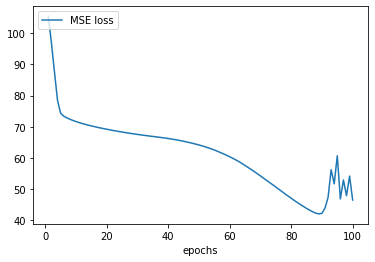

In [41]:
# Q2_graded
# plot loss
plt.plot(epoch_idx, loss, label='MSE loss')
plt.xlabel("epochs")
plt.legend(loc='upper left')
plt.show()

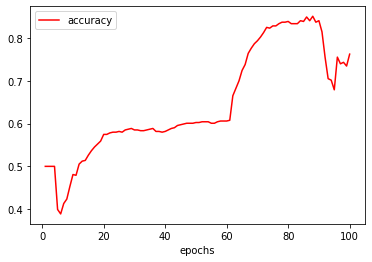

In [42]:
# Q2_graded
# plot accuracy
plt.plot(epoch_idx, accuracy, '-r', label='accuracy')
plt.xlabel("epochs")
plt.legend(loc='upper left')
plt.show()

In [43]:
# Q2_graded
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.forward_pass(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict_label(Z)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

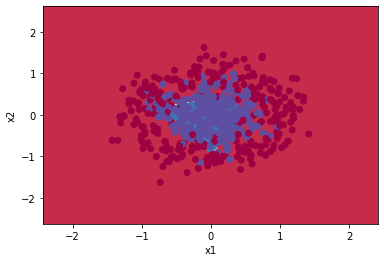

In [44]:
# Q2_graded
plot_decision_boundary(model, X.T, y_true.T)

**Try different MLPs with different layers**

A MLP with a hidden layer with too many neurons

In [45]:
# Q2_graded
input_size = X.shape[1]
examples_count = X.shape[0]
y_true = np.reshape(Y,(examples_count,1))
units_in_each_layer = [30, 1]
activations = ['relu', 'sigmoid']
learning_rate = 0.01
model = build_MLP(input_size, units_in_each_layer, activations, learning_rate)

loss = []
accuracy = []
epoch_idx = []
epochs = 30
for i in range(epochs):
  y_pred = model.forward_pass(X)
  model.backward_pass(y_pred, y_true, X)
  loss_epoch = model.MSE_loss(y_pred, y_true)
  accuracy_epoch = model.Accuracy(y_pred, y_true)
  print(f'epoch {i+1}/{epochs} ====> Loss:{loss_epoch}    Accuracy:{accuracy_epoch}')
  loss.append(loss_epoch)
  accuracy.append(accuracy_epoch)
  epoch_idx.append(i+1)

epoch 1/30 ====> Loss:131.88975693395247    Accuracy:0.5
epoch 2/30 ====> Loss:127.36459100503322    Accuracy:0.5
epoch 3/30 ====> Loss:121.93402863786892    Accuracy:0.5
epoch 4/30 ====> Loss:116.83286316851203    Accuracy:0.5
epoch 5/30 ====> Loss:112.79654844954761    Accuracy:0.53125
epoch 6/30 ====> Loss:109.6093894191213    Accuracy:0.5833333333333334
epoch 7/30 ====> Loss:107.17654021029267    Accuracy:0.6024305555555556
epoch 8/30 ====> Loss:105.37239454668523    Accuracy:0.6059027777777778
epoch 9/30 ====> Loss:104.09922981851794    Accuracy:0.6163194444444444
epoch 10/30 ====> Loss:103.21050867120373    Accuracy:0.5989583333333334
epoch 11/30 ====> Loss:102.5797762098171    Accuracy:0.5920138888888888
epoch 12/30 ====> Loss:102.09189747516733    Accuracy:0.5902777777777778
epoch 13/30 ====> Loss:101.68768488637167    Accuracy:0.5833333333333334
epoch 14/30 ====> Loss:101.32679129454878    Accuracy:0.5868055555555556
epoch 15/30 ====> Loss:101.00533840238239    Accuracy:0.5885

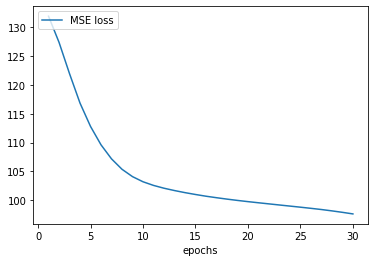

In [46]:
# Q2_graded
# plot loss
plt.plot(epoch_idx, loss, label='MSE loss')
plt.xlabel("epochs")
plt.legend(loc='upper left')
plt.show()

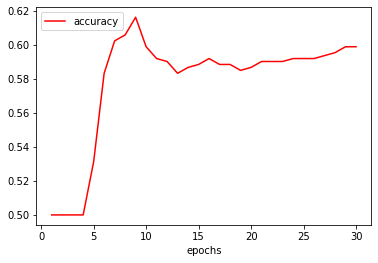

In [47]:
# Q2_graded
# plot accuracy
plt.plot(epoch_idx, accuracy, '-r', label='accuracy')
plt.xlabel("epochs")
plt.legend(loc='upper left')
plt.show()

A MLP with too many hidden layers

In [48]:
# Q2_graded
input_size = X.shape[1]
examples_count = X.shape[0]
y_true = np.reshape(Y,(examples_count,1))
units_in_each_layer = [15, 6, 3, 1]
activations = ['relu', 'relu', 'relu', 'sigmoid']
learning_rate = 0.01
model = build_MLP(input_size, units_in_each_layer, activations, learning_rate)

loss = []
accuracy = []
epoch_idx = []
epochs = 30
for i in range(epochs):
  y_pred = model.forward_pass(X)
  model.backward_pass(y_pred, y_true, X)
  loss_epoch = model.MSE_loss(y_pred, y_true)
  accuracy_epoch = model.Accuracy(y_pred, y_true)
  print(f'epoch {i+1}/{epochs} ====> Loss:{loss_epoch}    Accuracy:{accuracy_epoch}')
  loss.append(loss_epoch)
  accuracy.append(accuracy_epoch)
  epoch_idx.append(i+1)

epoch 1/30 ====> Loss:143.82979038863104    Accuracy:0.5
epoch 2/30 ====> Loss:143.8099317106302    Accuracy:0.5
epoch 3/30 ====> Loss:143.7855132214899    Accuracy:0.5
epoch 4/30 ====> Loss:143.75566541283047    Accuracy:0.5
epoch 5/30 ====> Loss:143.71933920562566    Accuracy:0.5
epoch 6/30 ====> Loss:143.67521485080968    Accuracy:0.5
epoch 7/30 ====> Loss:143.62014049088825    Accuracy:0.5
epoch 8/30 ====> Loss:143.5470955247713    Accuracy:0.5
epoch 9/30 ====> Loss:143.45600482714468    Accuracy:0.5
epoch 10/30 ====> Loss:143.3409694483393    Accuracy:0.5
epoch 11/30 ====> Loss:143.18528860519166    Accuracy:0.5
epoch 12/30 ====> Loss:142.96782146308243    Accuracy:0.5
epoch 13/30 ====> Loss:142.66305612090906    Accuracy:0.5
epoch 14/30 ====> Loss:142.21194498748355    Accuracy:0.5
epoch 15/30 ====> Loss:141.51134636059282    Accuracy:0.5
epoch 16/30 ====> Loss:140.34174151974437    Accuracy:0.5
epoch 17/30 ====> Loss:138.26337928868566    Accuracy:0.5
epoch 18/30 ====> Loss:134.

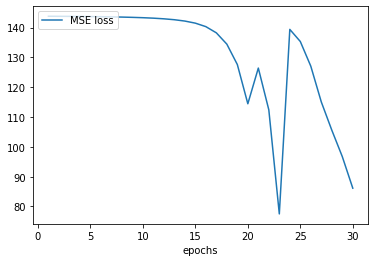

In [49]:
# Q2_graded
# plot loss
plt.plot(epoch_idx, loss, label='MSE loss')
plt.xlabel("epochs")
plt.legend(loc='upper left')
plt.show()

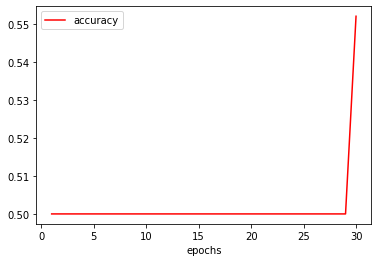

In [50]:
# Q2_graded
# plot accuracy
plt.plot(epoch_idx, accuracy, '-r', label='accuracy')
plt.xlabel("epochs")
plt.legend(loc='upper left')
plt.show()

# Q3. Keras


In [51]:
# Q3_graded
# Do not change the above line.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

print("Train input shape : ", x_train.shape)
print("Train output shape : ", y_train.shape)
print("Test input shape : ", x_test.shape)
print("Test output shape : ", y_test.shape)

Train input shape :  (50000, 3072)
Train output shape :  (50000, 10)
Test input shape :  (10000, 3072)
Test output shape :  (10000, 10)


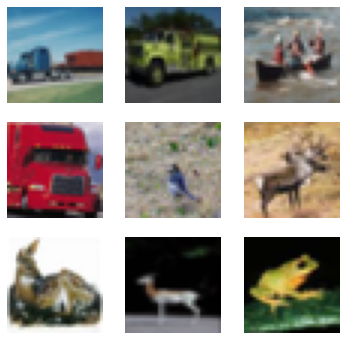

In [52]:
# Q3_graded
# show some random images from cifar-10
(x_train_tmp, y_train_tmp), (x_test_tmp, y_test_tmp) = keras.datasets.cifar10.load_data()
fig, axes1 = plt.subplots(3,3,figsize=(6,6))
for j in range(3):
    for k in range(3):
        i = np.random.choice(50000)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x_train_tmp[i,:])

In [53]:
# Q3_graded
def make_Model(
    input_shape,
    layers,
    activations,
    output_classes,
    last_layer_activation = 'sigmoid'
):
  act_dict = {'relu': tf.nn.relu, 'sigmoid' : tf.nn.sigmoid, 'tanh': tf.nn.tanh}
  input = keras.layers.Input(shape=input_shape)
  x = input

  for i in range(len(layers)):
    x = keras.layers.Dense(layers[i], activation=act_dict[activations[i]])(x)

  output = keras.layers.Dense(output_classes, activation=act_dict[last_layer_activation])(x)
  model = Model(inputs=input, outputs=output)

  return model

In [54]:
# Q3_graded
# First Model with 1 hidden layer - without normalization
input_shape = x_train.shape[1]
classes_count = y_train.shape[1]
layers_units_1 = [1024]
layers_activations_1 = ['relu']
last_layer_activation = 'sigmoid'

# build model
first_model = make_Model(input_shape, layers_units_1, layers_activations_1, classes_count, last_layer_activation)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
cce = tf.keras.losses.CategoricalCrossentropy()
first_model.compile(loss=cce, optimizer=opt, metrics=['accuracy'])
history = first_model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
391/391 [==============================] - 14s 36ms/step - loss: 4.9067 - accuracy: 0.0999 - val_loss: 4.8872 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 14s 35ms/step - loss: 4.8872 - accuracy: 0.1000 - val_loss: 4.8872 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 4.8872 - accuracy: 0.1000 - val_loss: 4.8872 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 4.8872 - accuracy: 0.1000 - val_loss: 4.8872 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 14s 35ms/step - loss: 4.8872 - accuracy: 0.1000 - val_loss: 4.8872 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 4.8872 - accuracy: 0.1000 - val_loss: 4.8872 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 4.8872 - accuracy: 0.1000 - val_loss: 4.8872 - val_accuracy:

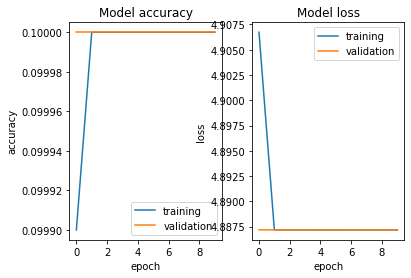

In [55]:
# Q3_graded
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

In [56]:
# Q3_graded
# First Model with 1 hidden layer - with normalization
x_train_normal = np.divide(x_train, 255.0)
x_test_normal = np.divide(x_test, 255.0)
input_shape = x_train_normal.shape[1]
classes_count = y_train.shape[1]
layers_units_1 = [1024]
layers_activations_1 = ['relu']
last_layer_activation = 'sigmoid'

# build model
first_model = make_Model(input_shape, layers_units_1, layers_activations_1, classes_count, last_layer_activation)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
cce = tf.keras.losses.CategoricalCrossentropy()
first_model.compile(loss=cce, optimizer=opt, metrics=['accuracy'])
history = first_model.fit(
    x=x_train_normal,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test_normal, y_test),
    shuffle=True,
)

Epoch 1/5
391/391 [==============================] - 14s 35ms/step - loss: 2.0263 - accuracy: 0.2733 - val_loss: 1.8843 - val_accuracy: 0.3354
Epoch 2/5
391/391 [==============================] - 13s 34ms/step - loss: 1.8373 - accuracy: 0.3548 - val_loss: 1.8224 - val_accuracy: 0.3431
Epoch 3/5
391/391 [==============================] - 14s 35ms/step - loss: 1.7751 - accuracy: 0.3786 - val_loss: 1.7662 - val_accuracy: 0.3716
Epoch 4/5
391/391 [==============================] - 14s 35ms/step - loss: 1.7295 - accuracy: 0.3969 - val_loss: 1.7314 - val_accuracy: 0.3864
Epoch 5/5
391/391 [==============================] - 14s 35ms/step - loss: 1.6930 - accuracy: 0.4085 - val_loss: 1.6993 - val_accuracy: 0.4068


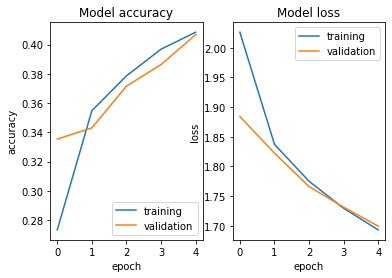

In [57]:
# Q3_graded
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

In [58]:
# Q3_graded
# Second Model with 2 hidden layer - with normalization
layers_units_1 = [1024, 512]
layers_activations_1 = ['relu', 'relu']

# build model
second_model = make_Model(input_shape, layers_units_1, layers_activations_1, classes_count, last_layer_activation)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
cce = tf.keras.losses.CategoricalCrossentropy()
second_model.compile(loss=cce, optimizer=opt, metrics=['accuracy'])
history = first_model.fit(
    x=x_train_normal,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test_normal, y_test),
    shuffle=True,
)

Epoch 1/5
391/391 [==============================] - 13s 34ms/step - loss: 1.6633 - accuracy: 0.4208 - val_loss: 1.6786 - val_accuracy: 0.4073
Epoch 2/5
391/391 [==============================] - 13s 34ms/step - loss: 1.6343 - accuracy: 0.4320 - val_loss: 1.6374 - val_accuracy: 0.4285
Epoch 3/5
391/391 [==============================] - 13s 34ms/step - loss: 1.6128 - accuracy: 0.4414 - val_loss: 1.6269 - val_accuracy: 0.4202
Epoch 4/5
391/391 [==============================] - 13s 35ms/step - loss: 1.5891 - accuracy: 0.4487 - val_loss: 1.6101 - val_accuracy: 0.4364
Epoch 5/5
391/391 [==============================] - 13s 34ms/step - loss: 1.5690 - accuracy: 0.4539 - val_loss: 1.5815 - val_accuracy: 0.4421


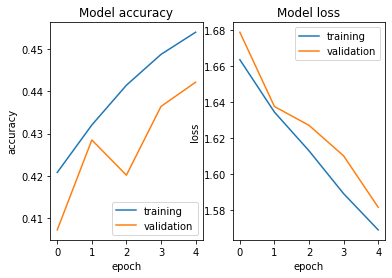

In [59]:
# Q3_graded
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

In [60]:
# Q3_graded
# Third Model with 6 hidden layer - with normalization
layers_units_1 = [1024, 512, 128, 64, 32, 16]
layers_activations_1 = ['relu', 'relu', 'relu', 'relu', 'relu', 'relu']

# build model
third_model = make_Model(input_shape, layers_units_1, layers_activations_1, classes_count, last_layer_activation)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
cce = tf.keras.losses.CategoricalCrossentropy()
third_model.compile(loss=cce, optimizer=opt, metrics=['accuracy'])
history = first_model.fit(
    x=x_train_normal,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test_normal, y_test),
    shuffle=True,
)

Epoch 1/5
391/391 [==============================] - 13s 34ms/step - loss: 1.5549 - accuracy: 0.4584 - val_loss: 1.5806 - val_accuracy: 0.4408
Epoch 2/5
391/391 [==============================] - 13s 34ms/step - loss: 1.5366 - accuracy: 0.4668 - val_loss: 1.5524 - val_accuracy: 0.4551
Epoch 3/5
391/391 [==============================] - 13s 34ms/step - loss: 1.5193 - accuracy: 0.4719 - val_loss: 1.5587 - val_accuracy: 0.4508
Epoch 4/5
391/391 [==============================] - 13s 34ms/step - loss: 1.5066 - accuracy: 0.4776 - val_loss: 1.6147 - val_accuracy: 0.4212
Epoch 5/5
391/391 [==============================] - 13s 34ms/step - loss: 1.4950 - accuracy: 0.4814 - val_loss: 1.5395 - val_accuracy: 0.4557


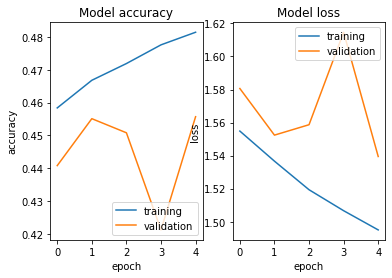

In [61]:
# Q3_graded
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

In [62]:
# Q3_graded
# Second Model with 2 hidden layer - with normalization - with momentum
layers_units_1 = [1024, 512]
layers_activations_1 = ['relu', 'relu']

# build model
second_model = make_Model(input_shape, layers_units_1, layers_activations_1, classes_count, last_layer_activation)
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
cce = tf.keras.losses.CategoricalCrossentropy()
second_model.compile(loss=cce, optimizer=opt, metrics=['accuracy'])
history = first_model.fit(
    x=x_train_normal,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test_normal, y_test),
    shuffle=True,
)

Epoch 1/5
391/391 [==============================] - 13s 34ms/step - loss: 1.4790 - accuracy: 0.4869 - val_loss: 1.5323 - val_accuracy: 0.4600
Epoch 2/5
391/391 [==============================] - 14s 35ms/step - loss: 1.4662 - accuracy: 0.4932 - val_loss: 1.5073 - val_accuracy: 0.4693
Epoch 3/5
391/391 [==============================] - 14s 35ms/step - loss: 1.4555 - accuracy: 0.4970 - val_loss: 1.5102 - val_accuracy: 0.4655
Epoch 4/5
391/391 [==============================] - 14s 35ms/step - loss: 1.4417 - accuracy: 0.5005 - val_loss: 1.5047 - val_accuracy: 0.4692
Epoch 5/5
391/391 [==============================] - 13s 34ms/step - loss: 1.4337 - accuracy: 0.5054 - val_loss: 1.5219 - val_accuracy: 0.4582


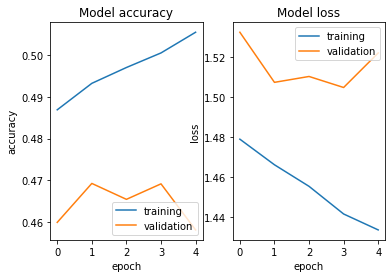

In [63]:
# Q3_graded
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

In [64]:
# Q3_graded
# Weight Decay
input = keras.layers.Input(shape=input_shape)
x = input
x = keras.layers.Dense(1024, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(x)
x = keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(1e-3))(x)
output = keras.layers.Dense(classes_count, activation=tf.nn.sigmoid)(x)
weight_deacy_model = Model(inputs=input, outputs=output)

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
cce = tf.keras.losses.CategoricalCrossentropy()
weight_deacy_model.compile(loss=cce, optimizer=opt, metrics=['accuracy'])
history = first_model.fit(
    x=x_train_normal,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test_normal, y_test),
    shuffle=True)

Epoch 1/5
391/391 [==============================] - 14s 35ms/step - loss: 1.4229 - accuracy: 0.5054 - val_loss: 1.4760 - val_accuracy: 0.4821
Epoch 2/5
391/391 [==============================] - 13s 34ms/step - loss: 1.4140 - accuracy: 0.5115 - val_loss: 1.4699 - val_accuracy: 0.4875
Epoch 3/5
391/391 [==============================] - 13s 34ms/step - loss: 1.4034 - accuracy: 0.5147 - val_loss: 1.5015 - val_accuracy: 0.4574
Epoch 4/5
391/391 [==============================] - 13s 34ms/step - loss: 1.3920 - accuracy: 0.5197 - val_loss: 1.4843 - val_accuracy: 0.4753
Epoch 5/5
391/391 [==============================] - 13s 34ms/step - loss: 1.3845 - accuracy: 0.5206 - val_loss: 1.4624 - val_accuracy: 0.4825


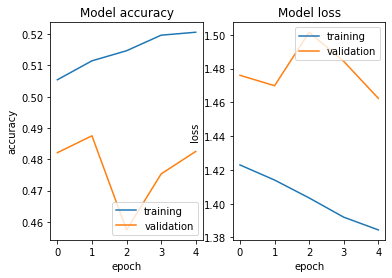

In [65]:
# Q3_graded
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

# Q5. Extra


In [66]:
# Q5_graded
# Do not change the above line.

# Type your code here

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI002_HW1.ipynb`
    - `Q2.py`
    - `Q3.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.